# Chapter 1 - Clustering for dataset exploration

In [73]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
seeds = pd.read_csv('seeds.csv',header=None)
seeds.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
samples = seeds.drop(7, axis=1).values
samples

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

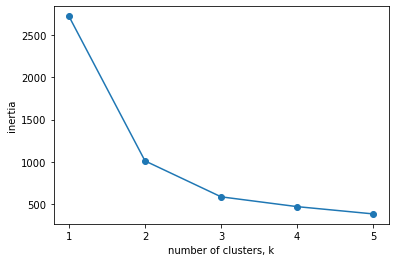

In [4]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [5]:
# seeds[7].replace({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}, inplace=True)
seeds["variety"] = seeds[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'})

In [6]:
varieties = seeds["variety"].tolist()

In [7]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


In [8]:
fish = pd.read_csv('fish.csv', header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [9]:
samples = fish.drop(0, axis=1).values
species = fish[0].tolist()

In [10]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [11]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1           33     0      1      0
2            0    17      0      0
3            1     0     19      1


In [12]:
stocks = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
stocks.rename(columns={'Unnamed: 0':'company'}, inplace=True)
stocks.head()

,company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [13]:
movements = stocks.drop('company', axis=1).values
companies = stocks['company'].tolist()

In [14]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [15]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
29       0                     Lookheed Martin
4        0                              Boeing
36       0                    Northrop Grumman
1        1                                 AIG
26       1                      JPMorgan Chase
3        1                    American express
5        1                     Bank of America
58       1                               Xerox
18       1                       Goldman Sachs
17       1                     Google/Alphabet
16       1                   General Electrics
15       1                                Ford
55       1                         Wells Fargo
27       2                      Kimberly-Clark
25       2                   Johnson & Johnson
54       2                            Walgreen
9        2                   Colgate-Palmolive
56       2                            Wal-Mart
38       2                               Pepsi
39       2                              Pfizer
40       2   

# Chapter 2 - Visualization with hierarchical clustering and t-SNE

In [16]:
samples = seeds.drop([7, 'variety'], axis=1).values
varieties = seeds['variety'].tolist()

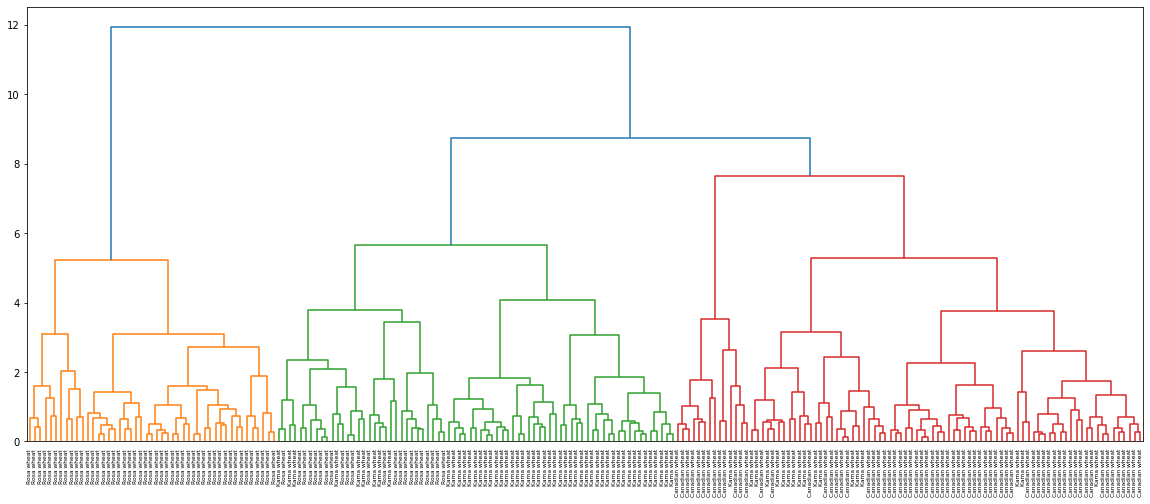

In [17]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=[20,8])
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

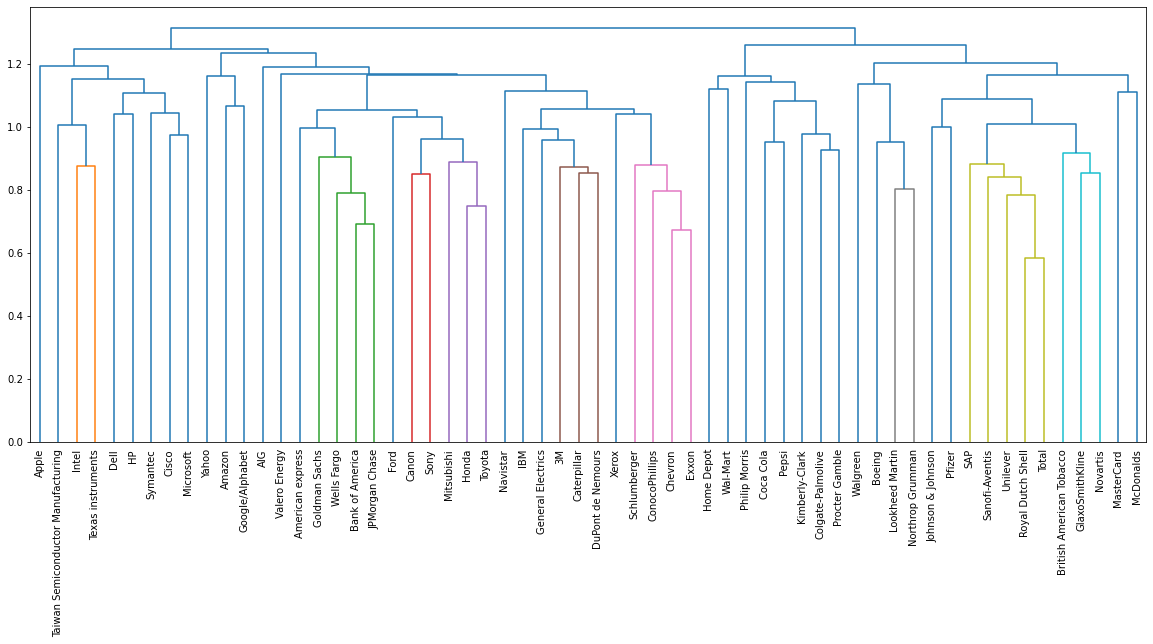

In [18]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate th linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
plt.figure(figsize=[20,8])
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [19]:
eurovision = pd.read_csv('eurovision-2016.csv')
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [20]:
eurovision.fillna(0, inplace=True)
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,0.0,0.0
1,Albania,Czech Republic,21,15,25,23,16,22,22,0.0,0.0
2,Albania,The Netherlands,22,14,23,24,21,24,24,0.0,0.0
3,Albania,Azerbaijan,19,12,11,21,11,13,19,0.0,0.0
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [21]:
pt = eurovision.pivot_table('Jury Points', ['From country'], 'To country')
pt.reset_index(drop=False, inplace=True )
pt.fillna(0, inplace=True)
pt.head()

To country,From country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
0,Albania,0.0,12.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,2.0,0.0,7.0,0.0,6.0,0.0,0.0,0.0,5.0
1,Armenia,0.0,5.0,0.0,0.0,4.0,7.0,0.0,6.0,1.0,...,0.0,8.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
2,Australia,0.0,0.0,0.0,0.0,12.0,8.0,1.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,2.0,4.0
3,Austria,2.0,12.0,0.0,0.0,5.0,0.0,6.0,0.0,4.0,...,1.0,10.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.0
4,Azerbaijan,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,5.0,6.0,2.0,12.0,0.0,1.0,0.0,0.0,10.0,0.0


In [22]:
samples = pt.drop(['From country'], axis=1).values
country_names = pt['From country'].tolist()

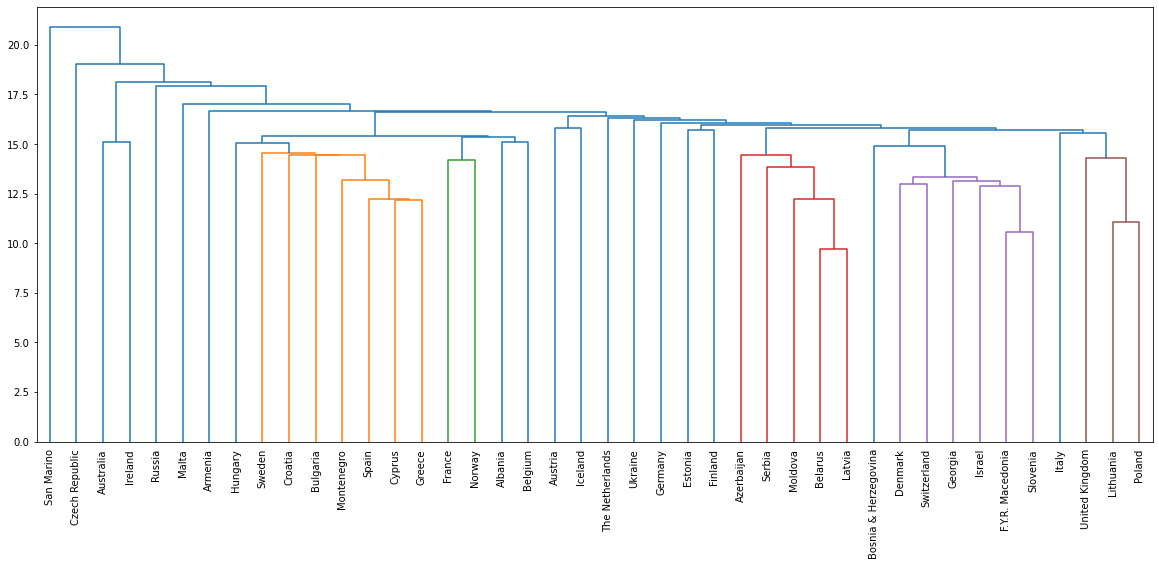

In [23]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
plt.figure(figsize=[20,8])
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [24]:
samples = seeds.drop([7, 'variety'], axis=1).values
varieties = seeds['variety'].tolist()
variety_numbers = seeds[7].tolist()
mergings = linkage(samples, method='complete')

In [25]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


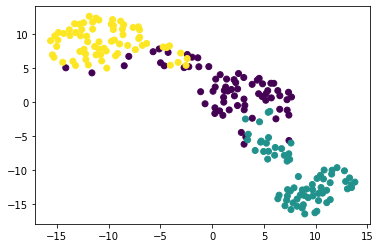

In [26]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

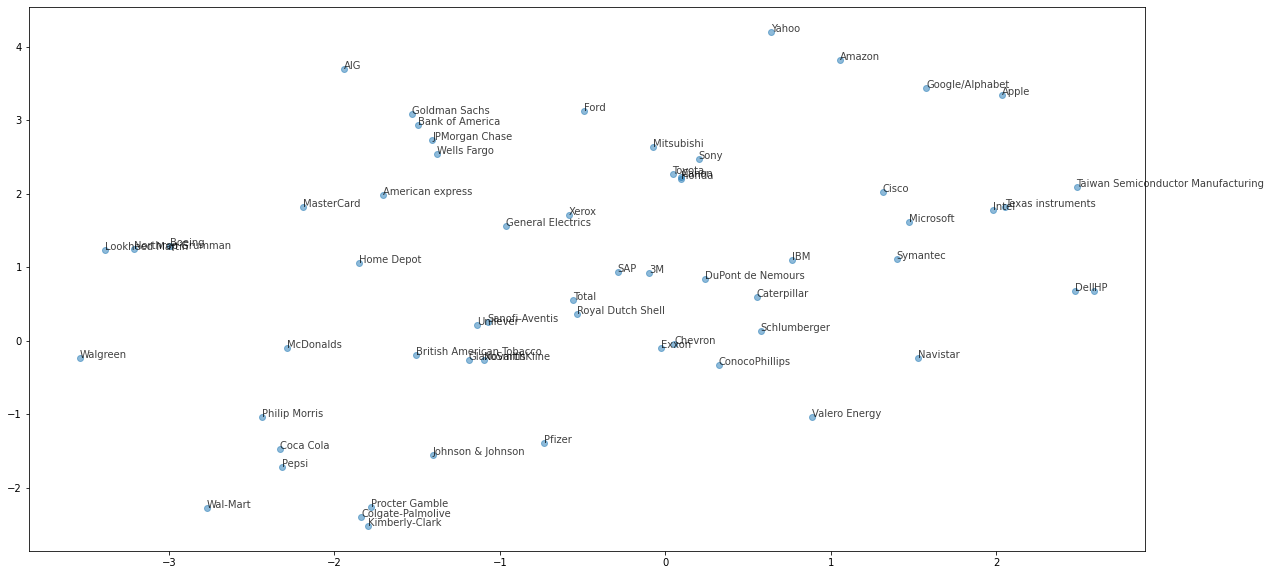

In [27]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=[20,10])
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()

# Chapter 3 - Decorrelating your data and dimension reduction

In [28]:
def pca_top_features(model, feature_names):
    # Dump components relations with features:
    pc_list = np.arange(model.components_[0].size)+1
    pc_list = pc_list.tolist()
    pc_list = ['PC' + str(i) for i in pc_list]
    print('PCA Feature Matrix')
    print(pd.DataFrame(model.components_,columns=feature_names,index = pc_list))
    
    # number of components
    n_pcs= model.components_.shape[0]

    # get the index of the most important feature on EACH component i.e. largest absolute value
    # using LIST COMPREHENSION HERE
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

    initial_feature_names = feature_names

    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # using LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df = pd.DataFrame(sorted(dic.items()))
    print('')
    print('PCA Most Important Features')
    print(df)

In [29]:
grains_df = pd.read_csv('seeds-width-vs-length.csv', header=None)
grains_df.head()

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [30]:
grains = grains_df.values

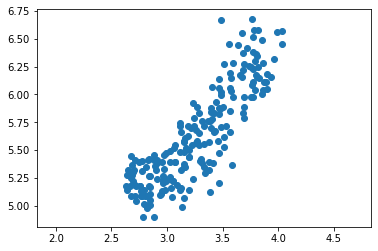

0.8604149377143467


In [31]:
# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

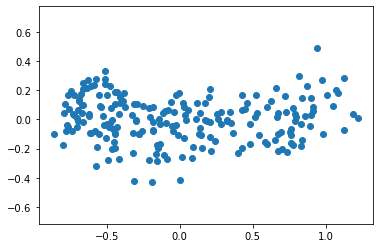

3.469446951953614e-18 0.999999999999971


In [32]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation, pvalue)

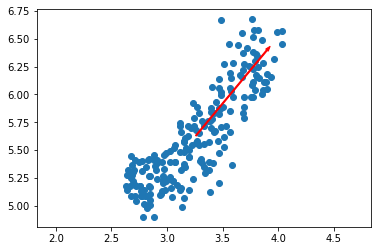

In [33]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [34]:
pca_top_features(model, ['width', 'height'])

PCA Feature Matrix
        width    height
PC1  0.639100  0.769123
PC2 -0.769123  0.639100

PCA Most Important Features
     0       1
0  PC1  height
1  PC2   width


In [35]:
samples = fish.drop(0, axis=1).values

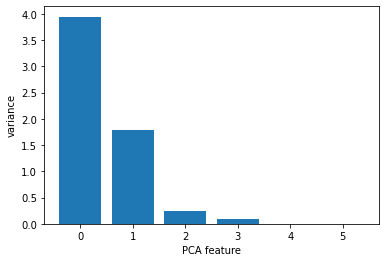

In [36]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## Identify the top features of PCA

In [37]:
pca.components_

array([[ 4.82436240e-01,  4.96621622e-01,  4.98907207e-01,
         5.03418214e-01,  1.27925132e-01,  4.38075428e-02],
       [-2.29692711e-02,  1.20740658e-01,  1.01658466e-01,
         3.84662570e-02, -6.87801239e-01, -7.07113474e-01],
       [-3.30179106e-01,  1.74024891e-01,  1.58914364e-01,
         8.59665344e-02, -6.17390765e-01,  6.68492123e-01],
       [ 8.10968282e-01, -2.25946074e-01, -2.23188963e-01,
        -2.64595558e-01, -3.46925836e-01,  2.26046808e-01],
       [ 2.48122808e-04, -5.04753531e-01, -2.89235256e-01,
         8.07748499e-01, -9.50518420e-02,  8.61905647e-03],
       [ 6.31103609e-03,  6.34567759e-01, -7.62910895e-01,
         1.23417004e-01,  9.33336166e-04,  4.27407804e-03]])

In [38]:
cols = fish.drop(0, axis=1).columns
cols

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

In [39]:
pca_top_features(pca, cols)

PCA Feature Matrix
            1         2         3         4         5         6
PC1  0.482436  0.496622  0.498907  0.503418  0.127925  0.043808
PC2 -0.022969  0.120741  0.101658  0.038466 -0.687801 -0.707113
PC3 -0.330179  0.174025  0.158914  0.085967 -0.617391  0.668492
PC4  0.810968 -0.225946 -0.223189 -0.264596 -0.346926  0.226047
PC5  0.000248 -0.504754 -0.289235  0.807748 -0.095052  0.008619
PC6  0.006311  0.634568 -0.762911  0.123417  0.000933  0.004274

PCA Most Important Features
     0  1
0  PC1  4
1  PC2  6
2  PC3  6
3  PC4  1
4  PC5  4
5  PC6  3


## End

In [40]:
samples[:2,:]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8]])

In [41]:
scaled_samples = StandardScaler().fit_transform(samples)
scaled_samples[:2,:]

array([[-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 ,
         0.25373964],
       [-0.37434344, -0.29750241, -0.26893461, -0.14634781,  1.15869615,
         0.44376493]])

In [42]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


In [43]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [44]:
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [45]:
df = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [46]:
df.shape

(13125, 60)

In [47]:
df.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [48]:
df.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,13115,13116,13117,13118,13119,13120,13121,13122,13123,13124
HTTP 404,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Alexa Internet,0.0,0.0,0.029607,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Internet Explorer,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.003772,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011594,0.000000,0.0
HTTP cookie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Google Search,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006649,0.0


In [49]:
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [50]:
titles

['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis C',
 'Predniso

In [51]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [52]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
14      0                                 Climate change
19      0  2007 United Nations Climate Change Conference
18      0  2010 United Nations Climate Change Conference
17      0  Greenhouse gas emissions by the United States
16      0                                        350.org
15      0                                 Kyoto Protocol
13      0                               Connie Hedegaard
12      0                                   Nigel Lawson
11      0       Nationally Appropriate Mitigation Action
10      0                                 Global warming
59      1                                    Adam Levine
50      1                                   Chad Kroeger
57      1                          Red Hot Chili Peppers
56      1                                       Skrillex
55      1                                  Black Sabbath
54      1                                 Arctic Monkeys
58      1                      

# Chapter 4 - Discovering interpretable features

In [54]:
# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.38 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.01 0.02 0.52 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.44 0.   0.  ]
 [0.   0.   0.   0.5  0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.58 0.   0.  ]
 [0.   0.   0.   0.53 0.01 0.01]
 [0.   0.4

C:\Users\mkars\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [55]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)
df.head()

,0,1,2,3,4,5
HTTP 404,0.00000,0.0,0.0,0.0,0.0,0.440487
Alexa Internet,0.00000,0.0,0.0,0.0,0.0,0.566633
Internet Explorer,0.00382,0.0,0.0,0.0,0.0,0.398666
HTTP cookie,0.00000,0.0,0.0,0.0,0.0,0.381759
Google Search,0.00000,0.0,0.0,0.0,0.0,0.485541


In [56]:
# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575613
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422308
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [63]:
words = []
with open('Wikipedia articles/wikipedia-vocabulary-utf8.txt') as f:
    for word in f:
        words.append(word.rstrip('\n'))

In [65]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.627983
award      0.253174
starred    0.245326
role       0.211487
actress    0.186429
Name: 3, dtype: float64


In [66]:
digits = pd.read_csv('lcd-digits.csv', header=None)
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
samples = digits.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


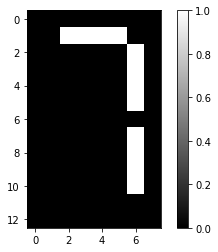

In [68]:
# Select the 0th row: digit
digit = samples[0]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [69]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

C:\Users\mkars\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


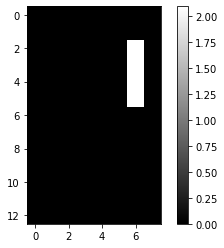

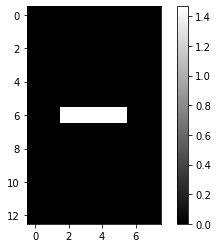

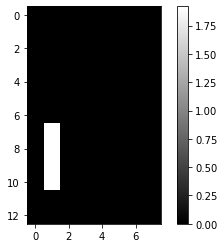

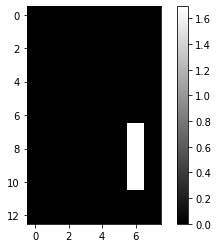

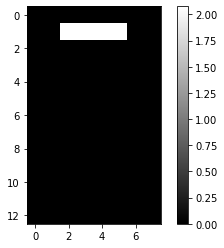

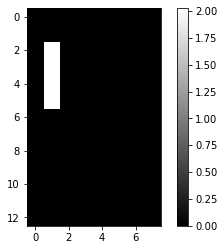

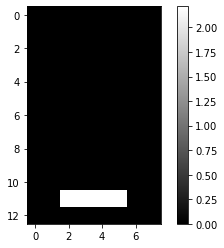

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [70]:
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

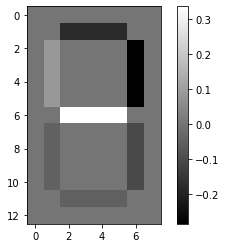

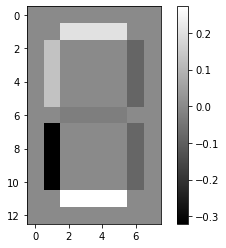

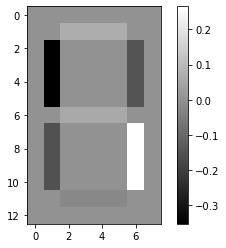

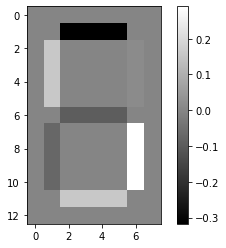

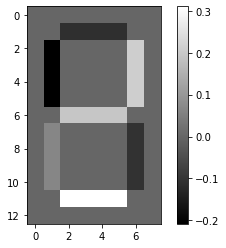

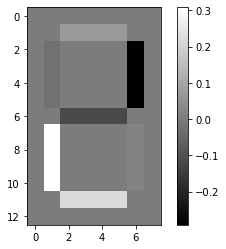

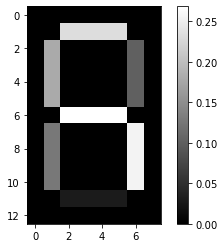

In [71]:
# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [72]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [75]:
artists_df = pd.read_csv('Musical artists/scrobbler-small-sample.csv')
artists_df.head()

,user_offset,artist_offset,playcount
0,1,79,58
1,1,84,80
2,1,86,317
3,1,89,64
4,1,96,159


In [88]:
print(artists_df.shape)
print(artists_df.artist_offset.describe())

(2894, 3)
count    2894.000000
mean       54.123013
std        32.216077
min         0.000000
25%        24.000000
50%        56.000000
75%        82.000000
max       110.000000
Name: artist_offset, dtype: float64


In [102]:
artists_pt = artists_df.pivot_table('playcount', ['user_offset'], 'artist_offset')
artists_pt.reset_index(drop=True, inplace=True )
artists_pt.fillna(0, inplace=True)
artists_pt.head()

artist_offset,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,0.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
artists = csr_matrix(artists_pt.transpose())
artists

<111x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2894 stored elements in Compressed Sparse Row format>

In [104]:
artist_names = []
with open('Musical artists/artists.csv') as f:
    for artist_name in f:
        artist_names.append(artist_name.rstrip('\n'))

In [105]:
len(artist_names)

111

In [106]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

C:\Users\mkars\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [107]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.958619
Leonard Cohen        0.917992
Van Morrison         0.874607
Bob Dylan            0.866344
dtype: float64
